[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.8491

Classification Report:
              precision    recall  f1-score   support

    Negative       0.54      0.51      0.53      1512
    Positive       0.91      0.92      0.91      7741

    accuracy                           0.85      9253
   macro avg       0.72      0.71      0.72      9253
weighted avg       0.85      0.85      0.85      9253



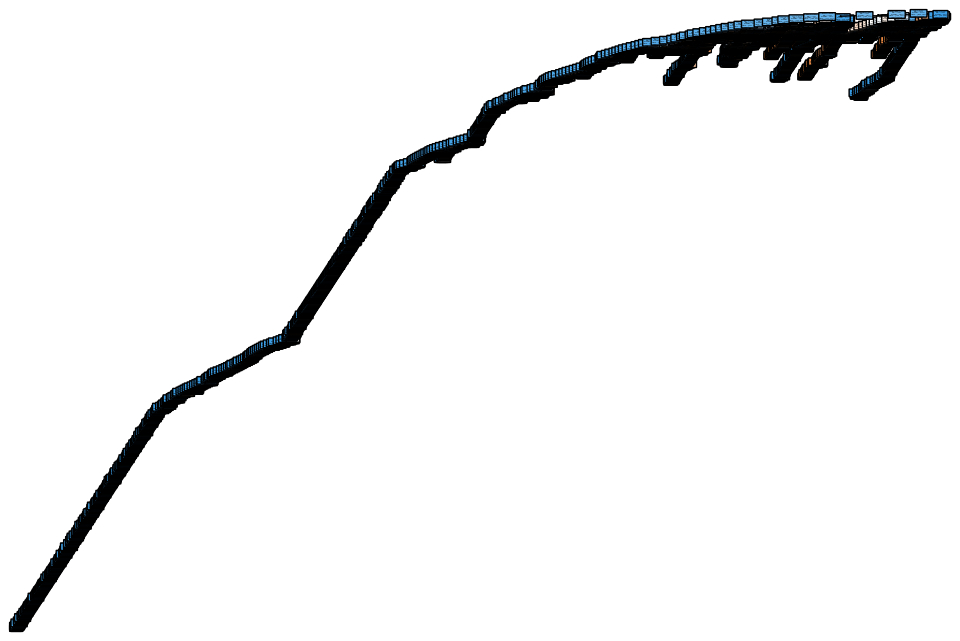

In [11]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Download NLTK data for stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the Amazon product reviews dataset
data = pd.read_csv("Nam change gara")

# Drop rows where 'review_body' or 'sentiment' is NaN
data.dropna(subset=['review_body', 'sentiment'], inplace=True)

# Preprocessing the text data (Clean and vectorize reviews)
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply the preprocessing function to the review text
data['cleaned_review'] = data['review_body'].apply(preprocess_text)

# Define the feature (X) and target (y) variables
X = data['cleaned_review']
y = data['sentiment']

# Step 2: Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use TF-IDF vectorization to convert text into numerical data
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 3: Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Step 4: Train the model using the training data
model.fit(X_train_tfidf, y_train)

# Step 5: Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for precision, recall, and F1 score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# Optional: Visualizing the Decision Tree (useful for small datasets)
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=["Negative", "Positive"], rounded=True)
plt.show()
